In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\100_days_of_deeplearning\day_11\Social_Network_Ads.csv")

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

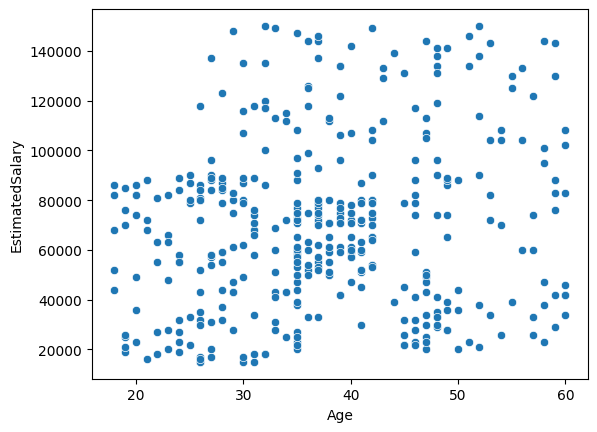

In [7]:
import seaborn as sns
sns.scatterplot(x='Age',y='EstimatedSalary',data=df)

In [8]:
X=df.iloc[:,0:2]

In [9]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [10]:
y=df.iloc[:,-1]

In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X_train

,Age,EstimatedSalary
3,27,57000
18,46,28000
202,39,134000
250,44,39000
274,57,26000
...,...,...
71,24,27000
106,26,35000
270,43,133000
348,39,77000


In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense

In [17]:
model=Sequential()
model.add(Dense(128,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False)

In [26]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 10ms/step - loss: 73.1671 - accuracy: 0.4969 - val_loss: 75.5709 - val_accuracy: 0.3500
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 46.0703 - accuracy: 0.5156 - val_loss: 16.4703 - val_accuracy: 0.6500
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 43.7984 - accuracy: 0.5531 - val_loss: 144.2324 - val_accuracy: 0.3500
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 73.9324 - accuracy: 0.5969 - val_loss: 171.3875 - val_accuracy: 0.3500
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 148.9592 - accuracy: 0.5094 - val_loss: 70.7862 - val_accuracy: 0.3500
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 60.0009 - accuracy: 0.4563 - val_loss: 9.0007 - val_accuracy: 0.2875
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 28.7335 - accuracy: 0.5312 - val_loss: 5.2553 - val_accuracy: 0.65

Epoch 58/100
10/10 [==============================] - 0s 7ms/step - loss: 48.5100 - accuracy: 0.4688 - val_loss: 4.7884 - val_accuracy: 0.6500
Epoch 59/100
10/10 [==============================] - 0s 6ms/step - loss: 35.0571 - accuracy: 0.5156 - val_loss: 19.7898 - val_accuracy: 0.3250
Epoch 60/100
10/10 [==============================] - 0s 6ms/step - loss: 57.7458 - accuracy: 0.4875 - val_loss: 11.1537 - val_accuracy: 0.2875
Epoch 61/100
10/10 [==============================] - 0s 7ms/step - loss: 28.8389 - accuracy: 0.4688 - val_loss: 73.3249 - val_accuracy: 0.3500
Epoch 62/100
10/10 [==============================] - 0s 7ms/step - loss: 104.3993 - accuracy: 0.4781 - val_loss: 226.2968 - val_accuracy: 0.3500
Epoch 63/100
10/10 [==============================] - 0s 6ms/step - loss: 140.6866 - accuracy: 0.5281 - val_loss: 79.3055 - val_accuracy: 0.3500
Epoch 64/100
10/10 [==============================] - 0s 6ms/step - loss: 94.7807 - accuracy: 0.4719 - val_loss: 153.2884 - val_accura

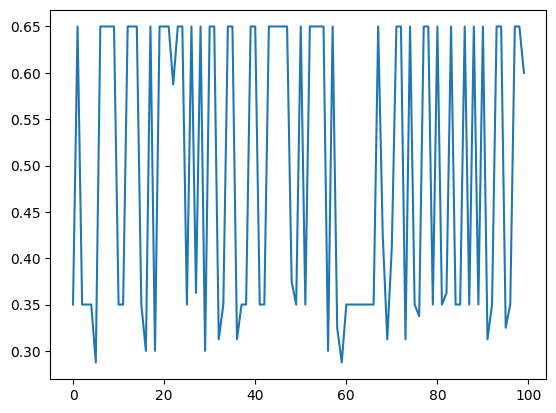

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [29]:
#feature scaling
from sklearn.preprocessing import StandardScaler

In [30]:
sc=StandardScaler()

In [31]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [32]:
model=Sequential()
model.add(Dense(128,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [33]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
history=model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 18ms/step - loss: 0.7051 - accuracy: 0.5688 - val_loss: 0.6642 - val_accuracy: 0.6250
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6462 - accuracy: 0.7063 - val_loss: 0.5996 - val_accuracy: 0.8000
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5987 - accuracy: 0.7781 - val_loss: 0.5434 - val_accuracy: 0.8250
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5582 - accuracy: 0.7969 - val_loss: 0.4960 - val_accuracy: 0.8250
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5223 - accuracy: 0.8031 - val_loss: 0.4569 - val_accuracy: 0.8250
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4918 - accuracy: 0.8031 - val_loss: 0.4230 - val_accuracy: 0.8250
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4664 - accuracy: 0.8125 - val_loss: 0.3920 - val_accuracy: 0.8500
Epoch 8/100


Epoch 59/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2573 - accuracy: 0.9031 - val_loss: 0.1755 - val_accuracy: 0.9375
Epoch 60/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2570 - accuracy: 0.9031 - val_loss: 0.1757 - val_accuracy: 0.9375
Epoch 61/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2567 - accuracy: 0.9031 - val_loss: 0.1757 - val_accuracy: 0.9375
Epoch 62/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2561 - accuracy: 0.9031 - val_loss: 0.1761 - val_accuracy: 0.9375
Epoch 63/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2558 - accuracy: 0.9062 - val_loss: 0.1753 - val_accuracy: 0.9500
Epoch 64/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2552 - accuracy: 0.9062 - val_loss: 0.1752 - val_accuracy: 0.9375
Epoch 65/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2552 - accuracy: 0.9031 - val_loss: 0.1764 - val_accuracy: 0.9375
Epoch 

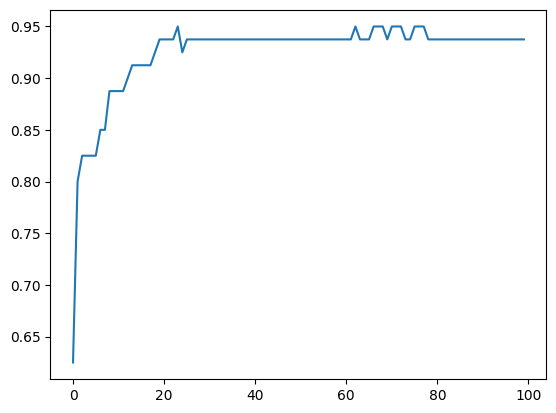

In [35]:
plt.plot(history.history['val_accuracy'])